In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

In [74]:
# Read CSV
got_data = pd.read_csv("merge_sample_after_filter.csv")
got_data

,Unnamed: 0,index,Year,Team,GameNo,D/N,Attendance,API DATE Format,Capacity,Attendance Rate,Icon,Precipitation,Temperature,Summary
0,0,80,2009,BOS,1,D,37057,2009-04-07,36984,100.197383,cloudy,0.0000,47.67,Overcast
1,1,82,2009,BOS,3,D,37784,2009-04-09,36984,102.163098,partly-cloudy-day,0.0000,58.28,Partly Cloudy
2,2,85,2009,BOS,12,D,37869,2009-04-19,36984,102.392927,clear-day,0.0000,52.93,Clear
3,3,86,2009,BOS,13,D,37865,2009-04-20,36984,102.382111,clear-day,0.0000,51.57,Clear
4,20,247,2010,BOS,12,D,37143,2010-04-18,36986,100.424485,cloudy,0.0011,48.42,Overcast
5,21,248,2010,BOS,13,D,37609,2010-04-19,36986,101.684421,cloudy,0.0000,54.26,Overcast
6,23,260,2010,BOS,31,D,37138,2010-05-08,36986,100.410966,rain,0.1115,54.50,Rain
7,24,264,2010,BOS,35,D,37198,2010-05-12,36986,100.573190,partly-cloudy-day,0.0000,51.70,Mostly Cloudy
8,40,322,2010,BOS,162,D,37453,2010-10-03,36986,101.262640,cloudy,0.0000,56.23,Overcast
9,41,404,2011,BOS,7,D,37178,2011-04-08,37065,100.304870,clear-day,0.0000,51.59,Clear


In [75]:
# Create a dataframe based on the values in the "attendance rate column
attendance_rate_df = pd.DataFrame(got_data, columns = ['Year', 'Team','Attendance Rate','Temperature','D/N'])

In [76]:
# Print DataFrame

attendance_rate_chc_d = attendance_rate_df[(attendance_rate_df['Team']=='CHC')&(attendance_rate_df['D/N']=='D')]
attendance_rate_chc_n = attendance_rate_df[(attendance_rate_df['Team']=='CHC')&(attendance_rate_df['D/N']=='N')]
attendance_rate_bos_d = attendance_rate_df[(attendance_rate_df['Team']=='BOS')&(attendance_rate_df['D/N']=='D')]
attendance_rate_bos_n  = attendance_rate_df[(attendance_rate_df['Team']=='BOS')&(attendance_rate_df['D/N']=='N')]




attendance_rate_bos_d.count()

Year               55
Team               55
Attendance Rate    55
Temperature        55
D/N                55
dtype: int64

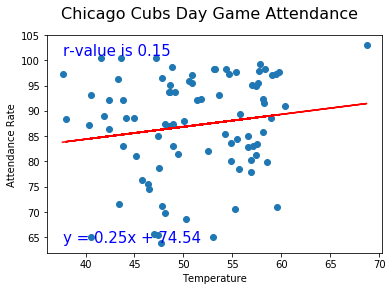

In [77]:
x_values = attendance_rate_chc_d['Temperature']
y_values = attendance_rate_chc_d['Attendance Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(attendance_rate_chc_d['Temperature']),min(attendance_rate_chc_d['Attendance Rate'])),fontsize=15,color="blue")
plt.annotate(f"r-value is {round(rvalue,2)}",(min(attendance_rate_chc_d['Temperature']),max(attendance_rate_chc_d['Attendance Rate'])-2),fontsize=15,color="blue")
plt.suptitle('Chicago Cubs Day Game Attendance', fontsize=16)
plt.xlabel('Temperature')
plt.ylabel('Attendance Rate')
plt.show()



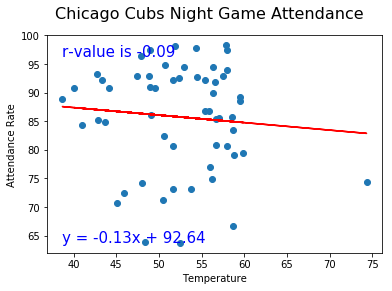

In [78]:
x_values = attendance_rate_chc_n['Temperature']
y_values = attendance_rate_chc_n['Attendance Rate']
(slope, intercept, rvalue, pvalue, stder) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(attendance_rate_chc_n['Temperature']),min(attendance_rate_chc_n['Attendance Rate'])),fontsize=15,color="blue")
plt.annotate(f"r-value is {round(rvalue,2)}",(min(attendance_rate_chc_n['Temperature']),max(attendance_rate_chc_n['Attendance Rate'])-2),fontsize=15,color="blue")
plt.suptitle('Chicago Cubs Night Game Attendance', fontsize=16)
plt.xlabel('Temperature')
plt.ylabel('Attendance Rate')
plt.show()


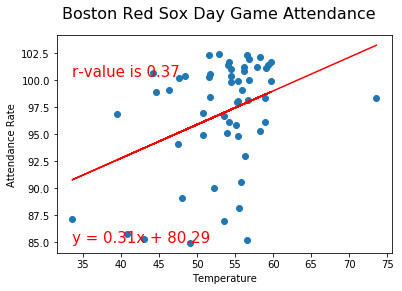

In [79]:
x_values = attendance_rate_bos_d['Temperature']
y_values = attendance_rate_bos_d['Attendance Rate']
(slope, intercept, rvalue, pvalue, stder) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(attendance_rate_bos_d['Temperature']),min(attendance_rate_bos_d['Attendance Rate'])),fontsize=15,color="red")
plt.annotate(f"r-value is {round(rvalue,2)}",(min(attendance_rate_bos_d['Temperature']),max(attendance_rate_bos_d['Attendance Rate'])-2),fontsize=15,color="red")
plt.suptitle('Boston Red Sox Day Game Attendance', fontsize=16)
plt.xlabel('Temperature')
plt.ylabel('Attendance Rate')
plt.show()


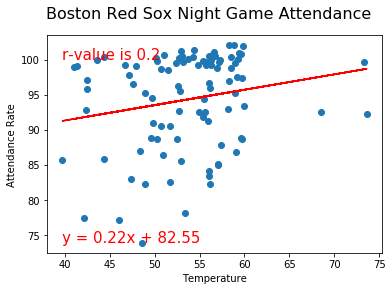

In [80]:
x_values = attendance_rate_bos_n['Temperature']
y_values = attendance_rate_bos_n['Attendance Rate']
(slope, intercept, rvalue, pvalue, stder) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(attendance_rate_bos_n['Temperature']),min(attendance_rate_bos_n['Attendance Rate'])),fontsize=15,color="red")
plt.annotate(f"r-value is {round(rvalue,2)}",(min(attendance_rate_bos_n['Temperature']),max(attendance_rate_bos_n['Attendance Rate'])-2),fontsize=15,color="red")
plt.suptitle('Boston Red Sox Night Game Attendance', fontsize=16)
plt.xlabel('Temperature')
plt.ylabel('Attendance Rate')
plt.show()

In [81]:
chicago_attendance_mean_day = attendance_rate_chc_d.groupby("Year").mean()
chicago_attendance_mean_day = chicago_attendance_mean_day.reset_index()

chicago_attendance_mean_night = attendance_rate_chc_n.groupby("Year").mean()
chicago_attendance_mean_night = chicago_attendance_mean_night.reset_index()

boston_attendance_mean_day =  attendance_rate_bos_d.groupby("Year").mean()
boston_attendance_mean_day = boston_attendance_mean_day.reset_index()

boston_attendance_mean_night =  attendance_rate_bos_n.groupby("Year").mean()
boston_attendance_mean_night = boston_attendance_mean_night.reset_index()


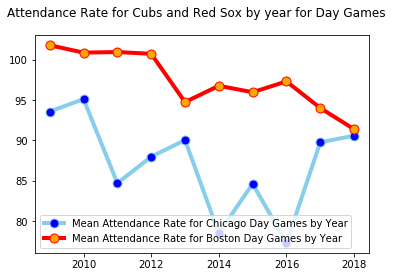

In [90]:
plt.plot( 'Year', 'Attendance Rate', data=chicago_attendance_mean_day, marker='o', markerfacecolor='blue', markersize=9, color='skyblue', linewidth=4,label='Mean Attendance Rate for Chicago Day Games by Year')
plt.plot( 'Year', 'Attendance Rate', data=boston_attendance_mean_day, marker='o', markerfacecolor='Orange', markersize=9, color='red', linewidth=4,label='Mean Attendance Rate for Boston Day Games by Year')
plt.suptitle("Attendance Rate for Cubs and Red Sox by year for Day Games")
plt.legend()

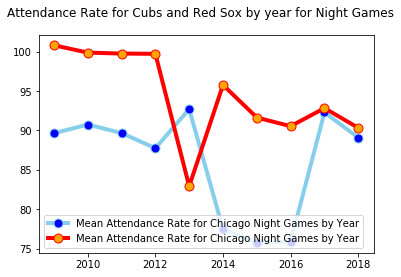

In [91]:
plt.plot( 'Year', 'Attendance Rate', data=chicago_attendance_mean_night, marker='o', markerfacecolor='blue', markersize=9, color='skyblue', linewidth=4,label='Mean Attendance Rate for Chicago Night Games by Year')
plt.plot( 'Year', 'Attendance Rate', data=boston_attendance_mean_night, marker='o', markerfacecolor='Orange', markersize=9, color='red', linewidth=4,label='Mean Attendance Rate for Chicago Night Games by Year')
plt.suptitle("Attendance Rate for Cubs and Red Sox by year for Night Games")
plt.legend()

In [67]:
chicago_attendence_rate_mean = attendance_rate_df["Attendance Rate"][attendance_rate_df["Team"]=="CHC"].mean()
boston_attendence_rate_mean = attendance_rate_df["Attendance Rate"][attendance_rate_df["Team"]=="BOS"].mean()

In [68]:
print(chicago_attendence_rate_mean)
print(boston_attendence_rate_mean)

87.4750164415413
95.27141040626671


In [72]:
stats.ttest_ind(attendance_rate_df["Attendance Rate"][attendance_rate_df["Team"]=="CHC"], attendance_rate_df["Attendance Rate"][attendance_rate_df["Team"]=="BOS"], equal_var=False)


Ttest_indResult(statistic=-7.006856240945312, pvalue=7.8319827912339e-11)

In [ ]:
#H0 = There is no difference between fan games attendance for Chicago Cubs and Boston Red Sox
#(Mean attendance Cubs = Mean Attendance Red Sox)

#Ha = Mean attendance Cubs <> Mean Attendance Red Sox
#p = 0.05

#T test P value = 7.8319827912339e-11
#< 0.05 So we reject H0 Hipotesis

#So we adopt Ha
#Mean attendance Cubs <> Mean Attendance Red Sox
#with a P Value of 0.05